In [24]:
import pandas as pd
import numpy as np
import seaborn as sns

csv_train = pd.read_csv("../../data/train_data/Simon_train_1.csv")
df_train = pd.DataFrame(csv_train)


df_time_offset = df_train["Timestamp"][0]
df_train["Timestamp"] = df_train["Timestamp"] - df_time_offset
df_train

,Timestamp,a_x,a_y,a_z,g_x,g_y,g_z,w_x,w_y,w_z,r_x,r_y,r_z,q_w,q_x,q_y,q_z
0,0.000000,-0.000533,-0.007367,-1.004930,0.056593,0.056863,-0.007179,0.0,0.0,0.0,3.914032,-1.043402,-79.052986,0.771046,-0.020548,0.028752,0.635798
1,0.010010,0.000256,-0.007676,-1.004579,0.216010,-0.052095,0.076256,0.0,0.0,0.0,3.916178,-1.043974,-79.052254,0.771050,-0.020560,0.028768,0.635792
2,0.020020,-0.000181,-0.008547,-1.003267,0.110046,-0.048779,0.007200,0.0,0.0,0.0,3.917279,-1.044466,-79.052216,0.771050,-0.020564,0.028777,0.635791
3,0.030029,-0.002241,-0.007397,-1.004185,0.003117,-0.014962,0.024897,0.0,0.0,0.0,3.917306,-1.044632,-79.051979,0.771052,-0.020564,0.028779,0.635790
4,0.040039,-0.002911,-0.008018,-1.004997,-0.014294,0.057817,-0.029038,0.0,0.0,0.0,3.491152,-0.948038,-78.937088,0.771749,-0.018258,0.025746,0.635143
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4996,49.960022,0.395614,0.179896,-0.922408,-48.989349,-278.695190,-218.831635,0.0,0.0,0.0,-2.240413,19.258068,81.310791,0.745680,0.123578,-0.114315,-0.644687
4997,49.970032,0.404915,0.174231,-0.932003,-38.087608,-270.344879,-231.778198,0.0,0.0,0.0,-3.324034,16.444098,79.017860,0.760635,0.113091,-0.092027,-0.632594
4998,49.979980,0.458733,0.173645,-0.957194,-46.045216,-236.222946,-232.245438,0.0,0.0,0.0,-4.370082,13.931380,76.780670,0.774576,0.104922,-0.071483,-0.619608
4999,49.989990,0.516315,0.061244,-1.146862,-28.217978,-218.084564,-213.895218,0.0,0.0,0.0,-5.087178,11.598048,74.782570,0.786939,0.096376,-0.053386,-0.607115


In [25]:
POSE_MAP= {
    "rett": 0,
    "framover": 1,
    "bakover": 2,
    "venstre": 3,
    "hoyre": 4
}

In [26]:
def get_timestamp_and_pose(filename):
    rows = []
    with open(filename, "r") as f:
        lines = f.readlines()
        offset = float(lines[1].strip().split(";")[1]) # This offset is the duration spent in the video before recording of data begun.
        for l in lines[1:]:
            sep_row = l.strip().split(";")
            finished_row = [round(float(x)-offset,2) for x in sep_row[1:3]]
            finished_row.append(POSE_MAP[sep_row[3].lower()])
            rows.append(finished_row)
    return rows

[[0.0, 8.6, 0], [10.36, 21.08, 1], [21.96, 30.8, 2], [32.72, 41.24, 3], [43.88, 51.52, 4], [52.52, 58.64, 0]]


<AxesSubplot:xlabel='Timestamp', ylabel='Pose'>

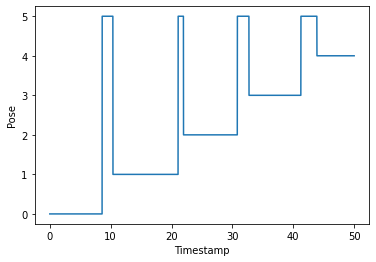

In [27]:
f_name = "../../data/annotation/simon_data_2.txt"
stamped_poses = get_timestamp_and_pose(f_name)
print(stamped_poses)

df_stamped_poses = []
index = 0
for stamp in df_train["Timestamp"]:  
    pose_id = -1
    if stamp <= stamped_poses[-1][1]: 
        if stamp > stamped_poses[index][1]:
            index += 1
        pose_id = stamped_poses[index][2]
        # If timestamp is in new index, but haven't reached the starting time of this interval yet, set pose_id to default value 5.
        if stamp < stamped_poses[index][0]:
            pose_id = 5
    # If timestamp of the data point exceeds last timestamp recorded by the annotation, append default -1 value
    df_stamped_poses.append(pose_id)

df_train["Pose"] = df_stamped_poses
y_train = df_stamped_poses
#print(df[2400:2500][:])

#df['Pose'].hist(bins=4)
sns.lineplot(data=df_train, x="Timestamp", y='Pose')

In [28]:
x_train = df_train.drop(['Timestamp'],axis=1)
x_train = x_train.drop(['Pose'],axis=1)
x_train

,a_x,a_y,a_z,g_x,g_y,g_z,w_x,w_y,w_z,r_x,r_y,r_z,q_w,q_x,q_y,q_z
0,-0.000533,-0.007367,-1.004930,0.056593,0.056863,-0.007179,0.0,0.0,0.0,3.914032,-1.043402,-79.052986,0.771046,-0.020548,0.028752,0.635798
1,0.000256,-0.007676,-1.004579,0.216010,-0.052095,0.076256,0.0,0.0,0.0,3.916178,-1.043974,-79.052254,0.771050,-0.020560,0.028768,0.635792
2,-0.000181,-0.008547,-1.003267,0.110046,-0.048779,0.007200,0.0,0.0,0.0,3.917279,-1.044466,-79.052216,0.771050,-0.020564,0.028777,0.635791
3,-0.002241,-0.007397,-1.004185,0.003117,-0.014962,0.024897,0.0,0.0,0.0,3.917306,-1.044632,-79.051979,0.771052,-0.020564,0.028779,0.635790
4,-0.002911,-0.008018,-1.004997,-0.014294,0.057817,-0.029038,0.0,0.0,0.0,3.491152,-0.948038,-78.937088,0.771749,-0.018258,0.025746,0.635143
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4996,0.395614,0.179896,-0.922408,-48.989349,-278.695190,-218.831635,0.0,0.0,0.0,-2.240413,19.258068,81.310791,0.745680,0.123578,-0.114315,-0.644687
4997,0.404915,0.174231,-0.932003,-38.087608,-270.344879,-231.778198,0.0,0.0,0.0,-3.324034,16.444098,79.017860,0.760635,0.113091,-0.092027,-0.632594
4998,0.458733,0.173645,-0.957194,-46.045216,-236.222946,-232.245438,0.0,0.0,0.0,-4.370082,13.931380,76.780670,0.774576,0.104922,-0.071483,-0.619608
4999,0.516315,0.061244,-1.146862,-28.217978,-218.084564,-213.895218,0.0,0.0,0.0,-5.087178,11.598048,74.782570,0.786939,0.096376,-0.053386,-0.607115


In [29]:

print(y_train)
print(len(y_train))

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

In [30]:
csv_test = pd.read_csv("../../data/test_data/Simon_test_1.csv")
df_test = pd.DataFrame(csv_test)
df_time_offset = df_test["Timestamp"][0]
df_test["Timestamp"] = df_test["Timestamp"] - df_time_offset
df_test

,Timestamp,a_x,a_y,a_z,g_x,g_y,g_z,w_x,w_y,w_z,r_x,r_y,r_z,q_w,q_x,q_y,q_z
0,0.000000,0.062783,-0.664359,-0.745311,-1.486327,-0.954215,-1.100742,0.0,0.0,0.0,45.977032,2.722177,-50.473026,0.828528,-0.362494,0.146685,0.400777
1,0.010000,0.068403,-0.668227,-0.748759,0.846733,-0.104457,-2.227663,0.0,0.0,0.0,45.984718,2.737466,-50.489273,0.828422,-0.362581,0.146652,0.400930
2,0.020000,0.071032,-0.672759,-0.749368,0.630087,-0.068906,-1.911747,0.0,0.0,0.0,45.729458,2.834796,-50.418976,0.829316,-0.361150,0.144826,0.401037
3,0.030001,0.073829,-0.674456,-0.750533,0.789155,0.104108,-1.864622,0.0,0.0,0.0,45.736748,2.848875,-50.431267,0.829227,-0.361234,0.144787,0.401159
4,0.039999,0.074100,-0.673934,-0.749086,0.912611,-0.007038,-1.740844,0.0,0.0,0.0,45.745266,2.861296,-50.443478,0.829138,-0.361322,0.144765,0.401274
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5996,59.959995,0.288413,-0.607716,-0.857441,16.279032,-0.668786,-7.142547,0.0,0.0,0.0,33.901562,12.762970,-46.368332,0.861102,-0.308202,0.016335,0.404039
5997,59.969997,0.267898,-0.616100,-0.847874,16.176073,-1.929723,-5.452105,0.0,0.0,0.0,34.064842,12.784996,-46.423275,0.860428,-0.309486,0.016889,0.404472
5998,59.980000,0.243766,-0.607581,-0.840962,16.973791,-2.367597,-3.386166,0.0,0.0,0.0,34.225212,12.784409,-46.465641,0.859845,-0.310682,0.017575,0.404764
5999,59.990002,0.226962,-0.590494,-0.836024,18.708357,-3.271112,-2.419889,0.0,0.0,0.0,34.403584,12.771029,-46.505039,0.859246,-0.311974,0.018415,0.405005


[[0.0, 12.28, 0], [12.6, 22.64, 1], [24.16, 31.64, 3], [32.76, 42.0, 4], [42.64, 58.64, 2]]


<AxesSubplot:xlabel='Timestamp', ylabel='Pose'>

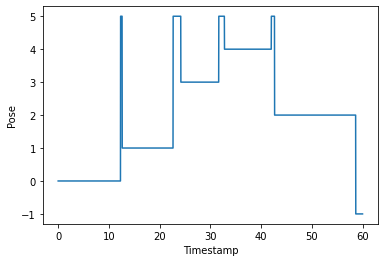

In [31]:
f_test = "../../data/annotation/Simon_test_1.txt"
stamped_poses = get_timestamp_and_pose(f_test)
print(stamped_poses)

df_stamped_poses = []
index = 0
for stamp in df_test["Timestamp"]:  
    pose_id = -1
    if stamp <= stamped_poses[-1][1]: 
        if stamp > stamped_poses[index][1]:
            index += 1
        pose_id = stamped_poses[index][2]
        # If timestamp is in new index, but haven't reached the starting time of this interval yet, set pose_id to default value 5.
        if stamp < stamped_poses[index][0]:
            pose_id = 5
    # If timestamp of the data point exceeds last timestamp recorded by the annotation, append default -1 value
    df_stamped_poses.append(pose_id)
y_test = df_stamped_poses
df_test["Pose"] = df_stamped_poses
#print(df[2400:2500][:])

#df['Pose'].hist(bins=4)
sns.lineplot(data=df_test, x="Timestamp", y='Pose')

In [32]:
df_test

,Timestamp,a_x,a_y,a_z,g_x,g_y,g_z,w_x,w_y,w_z,r_x,r_y,r_z,q_w,q_x,q_y,q_z,Pose
0,0.000000,0.062783,-0.664359,-0.745311,-1.486327,-0.954215,-1.100742,0.0,0.0,0.0,45.977032,2.722177,-50.473026,0.828528,-0.362494,0.146685,0.400777,0
1,0.010000,0.068403,-0.668227,-0.748759,0.846733,-0.104457,-2.227663,0.0,0.0,0.0,45.984718,2.737466,-50.489273,0.828422,-0.362581,0.146652,0.400930,0
2,0.020000,0.071032,-0.672759,-0.749368,0.630087,-0.068906,-1.911747,0.0,0.0,0.0,45.729458,2.834796,-50.418976,0.829316,-0.361150,0.144826,0.401037,0
3,0.030001,0.073829,-0.674456,-0.750533,0.789155,0.104108,-1.864622,0.0,0.0,0.0,45.736748,2.848875,-50.431267,0.829227,-0.361234,0.144787,0.401159,0
4,0.039999,0.074100,-0.673934,-0.749086,0.912611,-0.007038,-1.740844,0.0,0.0,0.0,45.745266,2.861296,-50.443478,0.829138,-0.361322,0.144765,0.401274,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5996,59.959995,0.288413,-0.607716,-0.857441,16.279032,-0.668786,-7.142547,0.0,0.0,0.0,33.901562,12.762970,-46.368332,0.861102,-0.308202,0.016335,0.404039,-1
5997,59.969997,0.267898,-0.616100,-0.847874,16.176073,-1.929723,-5.452105,0.0,0.0,0.0,34.064842,12.784996,-46.423275,0.860428,-0.309486,0.016889,0.404472,-1
5998,59.980000,0.243766,-0.607581,-0.840962,16.973791,-2.367597,-3.386166,0.0,0.0,0.0,34.225212,12.784409,-46.465641,0.859845,-0.310682,0.017575,0.404764,-1
5999,59.990002,0.226962,-0.590494,-0.836024,18.708357,-3.271112,-2.419889,0.0,0.0,0.0,34.403584,12.771029,-46.505039,0.859246,-0.311974,0.018415,0.405005,-1


In [33]:
x_test = df_test.drop(['Timestamp'],axis=1)
x_test = x_test.drop(['Pose'],axis=1)
x_test

,a_x,a_y,a_z,g_x,g_y,g_z,w_x,w_y,w_z,r_x,r_y,r_z,q_w,q_x,q_y,q_z
0,0.062783,-0.664359,-0.745311,-1.486327,-0.954215,-1.100742,0.0,0.0,0.0,45.977032,2.722177,-50.473026,0.828528,-0.362494,0.146685,0.400777
1,0.068403,-0.668227,-0.748759,0.846733,-0.104457,-2.227663,0.0,0.0,0.0,45.984718,2.737466,-50.489273,0.828422,-0.362581,0.146652,0.400930
2,0.071032,-0.672759,-0.749368,0.630087,-0.068906,-1.911747,0.0,0.0,0.0,45.729458,2.834796,-50.418976,0.829316,-0.361150,0.144826,0.401037
3,0.073829,-0.674456,-0.750533,0.789155,0.104108,-1.864622,0.0,0.0,0.0,45.736748,2.848875,-50.431267,0.829227,-0.361234,0.144787,0.401159
4,0.074100,-0.673934,-0.749086,0.912611,-0.007038,-1.740844,0.0,0.0,0.0,45.745266,2.861296,-50.443478,0.829138,-0.361322,0.144765,0.401274
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5996,0.288413,-0.607716,-0.857441,16.279032,-0.668786,-7.142547,0.0,0.0,0.0,33.901562,12.762970,-46.368332,0.861102,-0.308202,0.016335,0.404039
5997,0.267898,-0.616100,-0.847874,16.176073,-1.929723,-5.452105,0.0,0.0,0.0,34.064842,12.784996,-46.423275,0.860428,-0.309486,0.016889,0.404472
5998,0.243766,-0.607581,-0.840962,16.973791,-2.367597,-3.386166,0.0,0.0,0.0,34.225212,12.784409,-46.465641,0.859845,-0.310682,0.017575,0.404764
5999,0.226962,-0.590494,-0.836024,18.708357,-3.271112,-2.419889,0.0,0.0,0.0,34.403584,12.771029,-46.505039,0.859246,-0.311974,0.018415,0.405005


In [34]:
from sklearn import svm
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
k = 1
accuracy_array = []
k_array = []
for num in range(20):
    
    neigh = KNeighborsClassifier(n_neighbors=k)
    neigh.fit(x_train,y_train)
    predictions = neigh.predict(x_test)
    number_of_corrects = 0
   
    for num in range(len(predictions)):
        if(predictions[num] == y_test[num]):
            number_of_corrects += 1

    print("number of correct: {}".format(number_of_corrects))
    print("number of guesses: {}".format(len(predictions)))
    print("% correct: {}".format(number_of_corrects/len(predictions)*100))
    accuracy_array.append(number_of_corrects/len(predictions)*100)
    k_array.append(k)
    print("K: {}".format(k))
    k += 1
    print(accuracy_array)
    print(k_array)

resframe = pd.DataFrame({'k':k_array, '%':accuracy_array})
resframe
    

sns.lineplot(data=resframe,x="k",y="%")


NameError: name 'KNeighborsClassifier' is not defined

In [33]:
from sklearn.neighbors import NeighborhoodComponentsAnalysis,KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier

neigh = KNeighborsClassifier(n_neighbors=1)
neigh.fit(x_train,y_train)
predictions = neigh.predict(x_test)


In [34]:
for num in range(len(predictions)):
    print(predictions[num])

0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0


2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
1
2
2
2
2
2
2
2
1
1
2
2
1
2
0
0
1
1
1
1
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2


<AxesSubplot:xlabel='x', ylabel='y'>

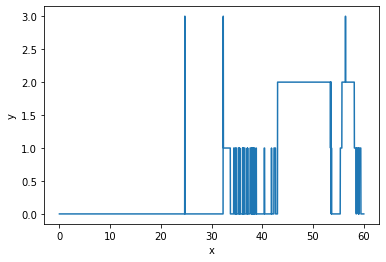

In [35]:
df_predict = pd.DataFrame({'x':df_test['Timestamp'],'y':predictions})
sns.lineplot(data=df_predict,x='x',y='y')

In [36]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions, zero_division=True))

[[   0   75   61    0    0    0    0]
 [   0 1229    0    0    0    0    0]
 [   0 1004    0    0    0    0    0]
 [   0  212   88 1296    4    0    0]
 [   0  743    0    0    5    0    0]
 [   0  703  221    0    0    0    0]
 [   0  278   78    0    4    0    0]]
              precision    recall  f1-score   support

          -1       1.00      0.00      0.00       136
           0       0.29      1.00      0.45      1229
           1       0.00      0.00      0.00      1004
           2       1.00      0.81      0.90      1600
           3       0.38      0.01      0.01       748
           4       1.00      0.00      0.00       924
           5       1.00      0.00      0.00       360

    accuracy                           0.42      6001
   macro avg       0.67      0.26      0.19      6001
weighted avg       0.61      0.42      0.33      6001



<AxesSubplot:>

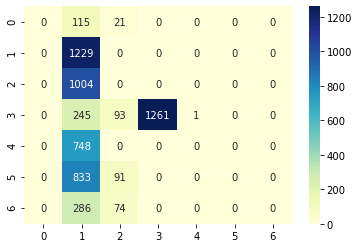

In [25]:
sns.heatmap(confusion_matrix(y_test, predictions), cmap="YlGnBu", annot=True, fmt="d")

In [26]:
number_of_corrects = 0
for num in range(len(predictions)):
    if(predictions[num] == y_test[num]):
        number_of_corrects += 1

print("number of correct: {}".format(number_of_corrects))
print("number of guesses: {}".format(len(predictions)))
print("% correct: {}".format(number_of_corrects/len(predictions)*100))

number of correct: 2490
number of guesses: 6001
% correct: 41.49308448591901
